# Lab 10

## Setup and Constants

In [1]:
%matplotlib widget
from matplotlib.pyplot import figure, xlabel, ylabel, legend, show, title, xlim, ylim
from custom_functions import scalar_times_list, plot
from control.matlab import tf, step, feedback, pzmap, sisotool, rlocus
from numpy import polyfit, array
from math import pi, sqrt
from pandas import read_csv

In [2]:
b = 3e-5
kdr = 180/pi
ti = 1
J = 1.29e-5
kt = 0.05

## Transfer functions
Create the plant transfer function, Gm, and create the three required controllers - Gc1, Gc2, and Gc3 using the form 
Gc = Kp + Kd\*s. Study the equation block in the handout carefully to discover how to manupulate a given Kp and z into Kp and Kd. Then, apply feedback to close the loop on the three open loop systems, GM\*Gcx, assigning them to T1, T2, and T3. Obtain the closed loop transfer function poles for T1, T2, and T3. 

In [3]:
# create transfer funtion
s = tf('s')
Gm= kt*kdr / (J*s**2+b*s)
Gc1 = .001
Gc2 = 10*.00007 + .00007*s
Gc3 = 10*.001 + .001*s

# close the loop
T1 = feedback(Gm*Gc1, 1)
T2 = feedback(Gm*Gc2, 1)
T3 = feedback(Gm*Gc3, 1)

# poles and zeros
p1, z1 = pzmap(T1, plot=False)
p2, z2 = pzmap(T2, plot=False)
p3, z3 = pzmap(T3, plot=False)

## Step responses and plotting

Generate a 1 second step response for each closed loop system, Tx. and keep the resulting theta and associated time vectors in variables named thx and tx.  Plot the three responses on the same figure.  Use the help command if you have forgotten how to use step() or plot().

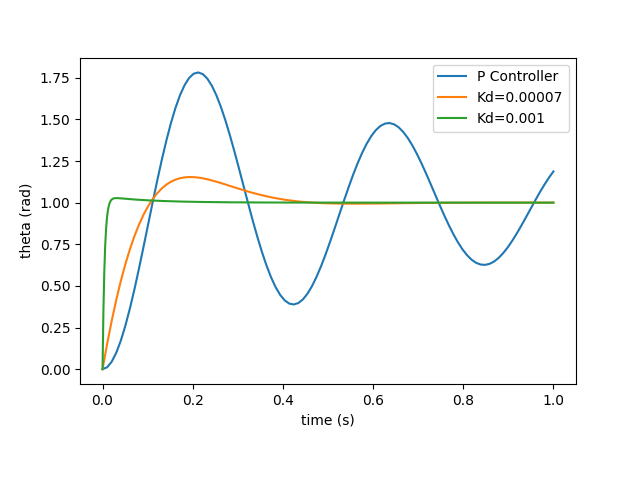

In [4]:
# Get step responses
th1, t1 = step(T1,1)
th2, t2 = step(T2,1)
th3, t3 = step(T3,1)

# plot
plot(t1, th1, t2, th2, t3, th3)
legend(["P Controller","Kd=0.00007","Kd=0.001"])
xlabel("time (s)")
ylabel("theta (rad)")
show()

## Experimental plots
Extract the time and position columns from the three data matrices. Plot them together on the same plot

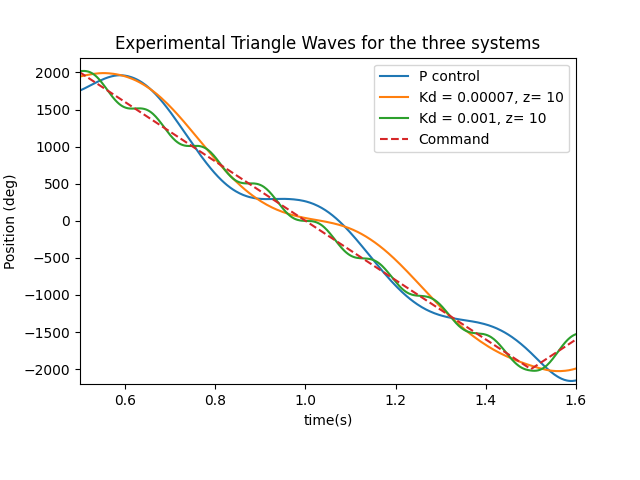

In [5]:
# Extract data from the experimentally generated step response
data1 = read_csv("data1.csv", header=None)
data2 = read_csv("data2.csv", header=None)
data3 = read_csv("data3.csv", header=None)

# extract time column of the data matrix
dt1 = data1.iloc[:,0]
dt2 = data2.iloc[:,0]
dt3 = data3.iloc[:,0]

# extract third angle column of the data matrix
dth1 = data1.iloc[:,2]
dth2 = data2.iloc[:,2]
dth3 = data3.iloc[:,2]
dcommand = data1.iloc[:,1]

plot(dt1, dth1, dt2, dth2, dt3, dth3, dt1, dcommand, '--')
title("Experimental Triangle Waves for the three systems")
xlabel("time(s)")
ylabel("Position (deg)")
legend(["P control","Kd = 0.00007, z= 10","Kd = 0.001, z= 10","Command","Location","southwest"])
xlim([0.5, 1.6])
ylim([-2200, 2200])
show()

## Root Locus Plot

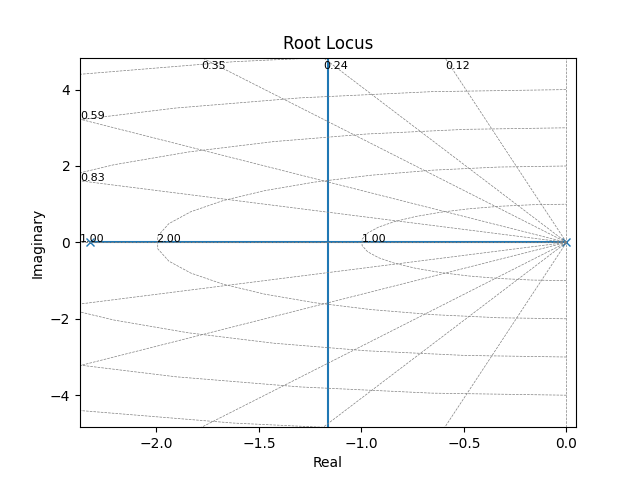

In [6]:
figure()
rlocus(Gm, plot=True)
show()

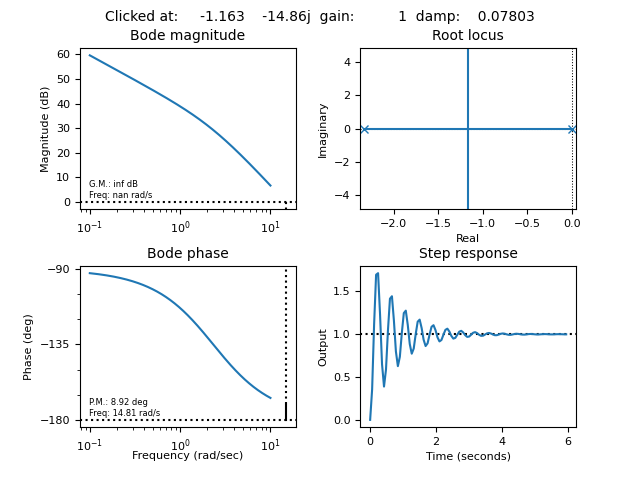

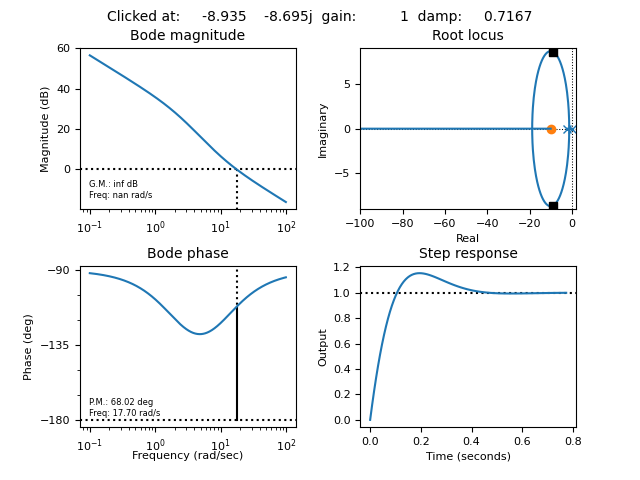

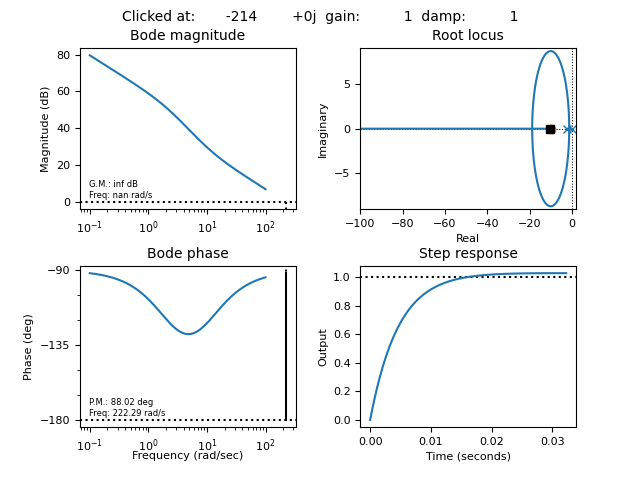

In [7]:
figure()
sisotool(Gc1*Gm)
show()

figure()
sisotool(Gc2*Gm)
show()

figure()
sisotool(Gc3*Gm)
show()